In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)


In [2]:
X_train = pd.read_csv('../pc_X_train.csv')
y_train = pd.read_csv('../pc_y_train.csv')
y_train = y_train.iloc[:, -1] # With iloc we extract the labels

In [3]:
X_train

,id,mean_down_time,std_down_time,max_down_time,sum_down_time,mean_up_time,std_up_time,max_up_time,sum_up_time,mean_length_activity,std_length_activity,sum_length_activity,mean_length_down_event,std_length_down_event,sum_length_down_event,mean_length_up_event,std_length_up_event,sum_length_up_event,mean_length_text_change,std_length_text_change,sum_length_text_change,mean_length_activity+length_down_event,std_length_activity+length_down_event,sum_length_activity+length_down_event,mean_length_activity-length_down_event,std_length_activity-length_down_event,sum_length_activity-length_down_event,mean_length_activity*length_down_event,std_length_activity*length_down_event,sum_length_activity*length_down_event,mean_length_activity/length_down_event,std_length_activity/length_down_event,max_length_activity/length_down_event,sum_length_activity/length_down_event,mean_length_activity+length_up_event,std_length_activity+length_up_event,sum_length_activity+length_up_event,mean_length_activity-length_up_event,std_length_activity-length_up_event,sum_length_activity-length_up_event,mean_length_activity*length_up_event,std_length_activity*length_up_event,sum_length_activity*length_up_event,mean_length_activity/length_up_event,std_length_activity/length_up_event,max_length_activity/length_up_event,sum_length_activity/length_up_event,mean_length_activity+length_text_change,std_length_activity+length_text_change,sum_length_activity+length_text_change,mean_length_activity-length_text_change,std_length_activity-length_text_change,sum_length_activity-length_text_change,mean_length_activity*length_text_change,std_length_activity*length_text_change,sum_length_activity*length_text_change,mean_length_activity/length_text_change,std_length_activity/length_text_change,max_length_activity/length_text_change,sum_length_activity/length_text_change,mean_length_down_event+length_up_event,std_length_down_event+length_up_event,sum_length_down_event+length_up_event,mean_length_down_event-length_up_event,std_length_down_event-length_up_event,sum_length_down_event-length_up_event,mean_length_down_event*length_up_event,std_length_down_event*length_up_event,sum_length_down_event*length_up_event,mean_length_down_event/length_up_event,std_length_down_event/length_up_event,max_length_down_event/length_up_event,sum_length_down_event/length_up_event,mean_length_down_event+length_text_change,std_length_down_event+length_text_change,sum_length_down_event+length_text_change,mean_length_down_event-length_text_change,std_length_down_event-length_text_change,sum_length_down_event-length_text_change,mean_length_down_event*length_text_change,std_length_down_event*length_text_change,sum_length_down_event*length_text_change,mean_length_down_event/length_text_change,std_length_down_event/length_text_change,max_length_down_event/length_text_change,sum_length_down_event/length_text_change,mean_length_up_event+length_text_change,std_length_up_event+length_text_change,sum_length_up_event+length_text_change,mean_length_up_event-length_text_change,std_length_up_event-length_text_change,sum_length_up_event-length_text_change,mean_length_up_event*length_text_change,std_length_up_event*length_text_change,sum_length_up_event*length_text_change,mean_length_up_event/length_text_change,std_length_up_event/length_text_change,max_length_up_event/length_text_change,sum_length_up_event/length_text_change,mean_total_length,std_total_length,max_total_length,sum_total_length,mean_cursor_position_word_count,std_cursor_position_word_count,max_cursor_position_word_count,mean_free_time1,std_free_time1,max_free_time1,sum_free_time1,count_free_time1,mean_cursor_position_change1,std_cursor_position_change1,max_cursor_position_change1,sum_cursor_position_change1,mean_word_count_change1,std_word_count_change1,max_word_count_change1,sum_word_count_change1,mean_cursor_position_word_count_change1,std_cursor_position_word_count_change1,max_cursor_position_word_count_change1,sum_cursor_position_word_count_change1,

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
X_train.isna().sum()

id                                                           0
mean_down_time                                               0
std_down_time                                                0
max_down_time                                                0
sum_down_time                                                0
mean_up_time                                                 0
std_up_time                                                  0
max_up_time                                                  0
sum_up_time                                                  0
mean_length_activity                                         0
std_length_activity                                          0
sum_length_activity                                          0
mean_length_down_event                                       0
std_length_down_event                                        0
sum_length_down_event                                        0
mean_length_up_event                                   

In [6]:
X_train.isna().sum().sum()

0

In [7]:
fieldnames = X_train.columns.tolist()
fieldnames

['id',
 'mean_down_time',
 'std_down_time',
 'max_down_time',
 'sum_down_time',
 'mean_up_time',
 'std_up_time',
 'max_up_time',
 'sum_up_time',
 'mean_length_activity',
 'std_length_activity',
 'sum_length_activity',
 'mean_length_down_event',
 'std_length_down_event',
 'sum_length_down_event',
 'mean_length_up_event',
 'std_length_up_event',
 'sum_length_up_event',
 'mean_length_text_change',
 'std_length_text_change',
 'sum_length_text_change',
 'mean_length_activity+length_down_event',
 'std_length_activity+length_down_event',
 'sum_length_activity+length_down_event',
 'mean_length_activity-length_down_event',
 'std_length_activity-length_down_event',
 'sum_length_activity-length_down_event',
 'mean_length_activity*length_down_event',
 'std_length_activity*length_down_event',
 'sum_length_activity*length_down_event',
 'mean_length_activity/length_down_event',
 'std_length_activity/length_down_event',
 'max_length_activity/length_down_event',
 'sum_length_activity/length_down_event'

In [8]:
X_train.dtypes

id                                                             int64
mean_down_time                                               float64
std_down_time                                                float64
max_down_time                                                  int64
sum_down_time                                                  int64
mean_up_time                                                 float64
std_up_time                                                  float64
max_up_time                                                    int64
sum_up_time                                                    int64
mean_length_activity                                         float64
std_length_activity                                          float64
sum_length_activity                                            int64
mean_length_down_event                                       float64
std_length_down_event                                        float64
sum_length_down_event             

array([[<Axes: title={'center': 'mean_down_time'}>,
        <Axes: title={'center': 'std_down_time'}>,
        <Axes: title={'center': 'max_down_time'}>,
        <Axes: title={'center': 'sum_down_time'}>],
       [<Axes: title={'center': 'mean_up_time'}>,
        <Axes: title={'center': 'std_up_time'}>,
        <Axes: title={'center': 'max_up_time'}>,
        <Axes: title={'center': 'sum_up_time'}>],
       [<Axes: title={'center': 'mean_length_activity'}>,
        <Axes: title={'center': 'std_length_activity'}>,
        <Axes: title={'center': 'sum_length_activity'}>,
        <Axes: title={'center': 'mean_length_down_event'}>],
       [<Axes: title={'center': 'std_length_down_event'}>,
        <Axes: title={'center': 'sum_length_down_event'}>,
        <Axes: title={'center': 'mean_length_up_event'}>,
        <Axes: title={'center': 'std_length_up_event'}>],
       [<Axes: title={'center': 'sum_length_up_event'}>,
        <Axes: title={'center': 'mean_length_text_change'}>,
        <Ax

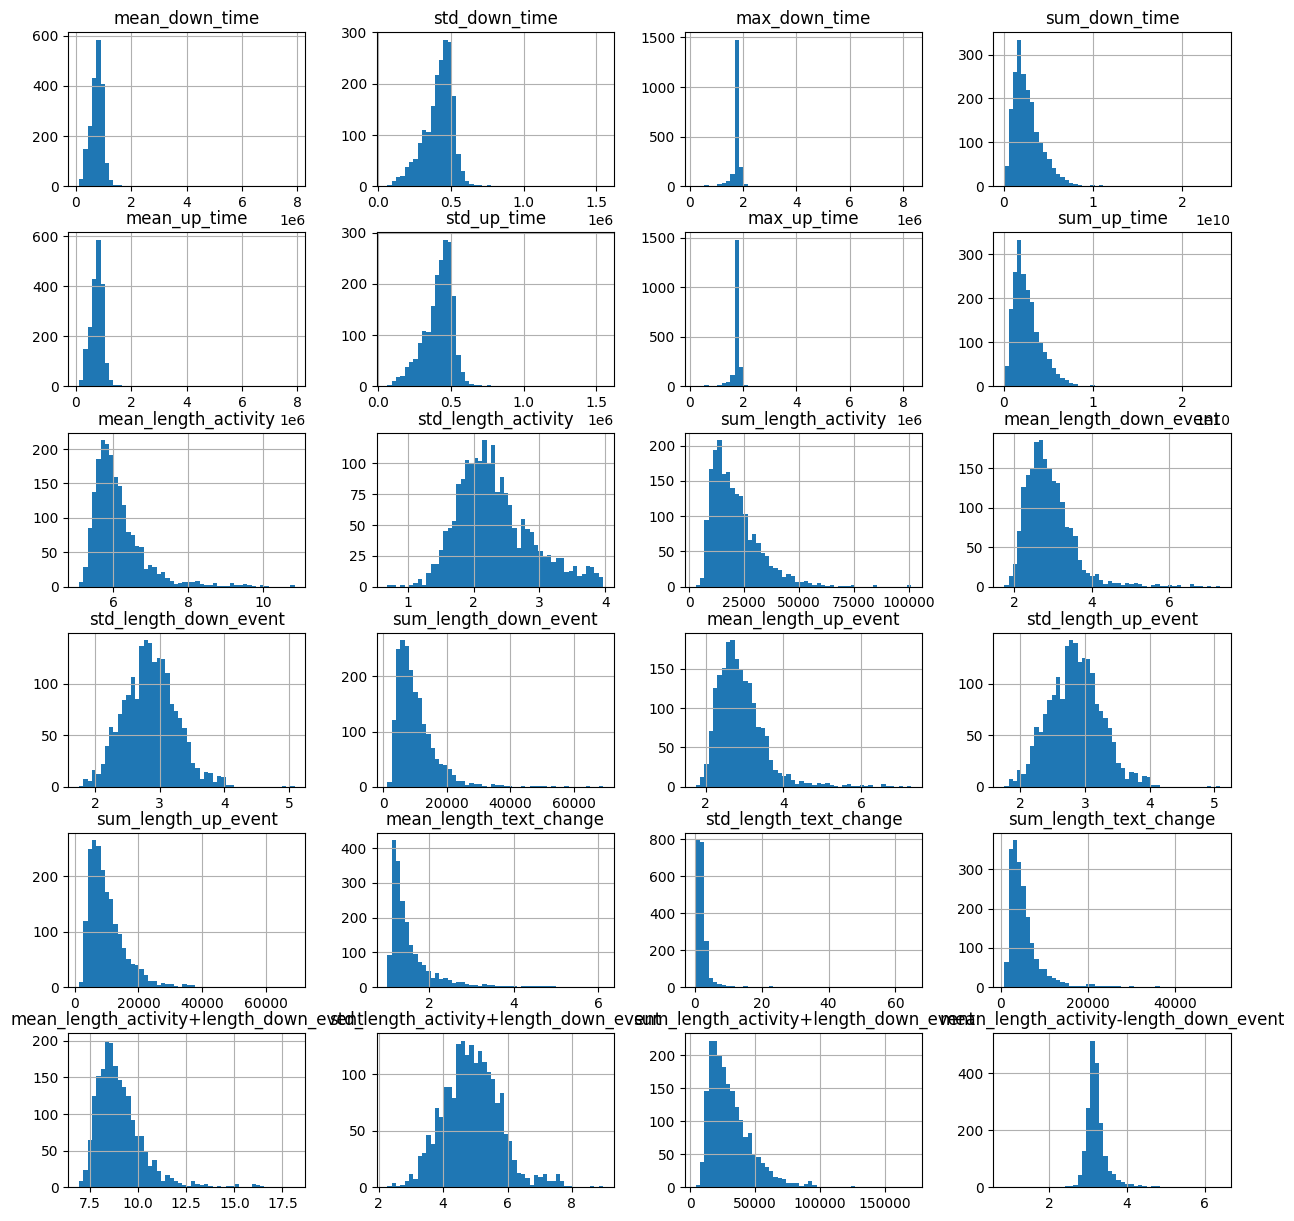

In [9]:
cols = 4
rows = 6
subset = [fieldnames[i] for i in range(1,rows * cols + 1)]
X_train[subset].hist(bins=50, figsize=(15,15), layout=(rows,cols))

array([[<Axes: title={'center': 'std_length_activity-length_down_event'}>,
        <Axes: title={'center': 'sum_length_activity-length_down_event'}>,
        <Axes: title={'center': 'mean_length_activity*length_down_event'}>,
        <Axes: title={'center': 'std_length_activity*length_down_event'}>],
       [<Axes: title={'center': 'sum_length_activity*length_down_event'}>,
        <Axes: title={'center': 'mean_length_activity/length_down_event'}>,
        <Axes: title={'center': 'std_length_activity/length_down_event'}>,
        <Axes: title={'center': 'max_length_activity/length_down_event'}>],
       [<Axes: title={'center': 'sum_length_activity/length_down_event'}>,
        <Axes: title={'center': 'mean_length_activity+length_up_event'}>,
        <Axes: title={'center': 'std_length_activity+length_up_event'}>,
        <Axes: title={'center': 'sum_length_activity+length_up_event'}>],
       [<Axes: title={'center': 'mean_length_activity-length_up_event'}>,
        <Axes: title={'cen

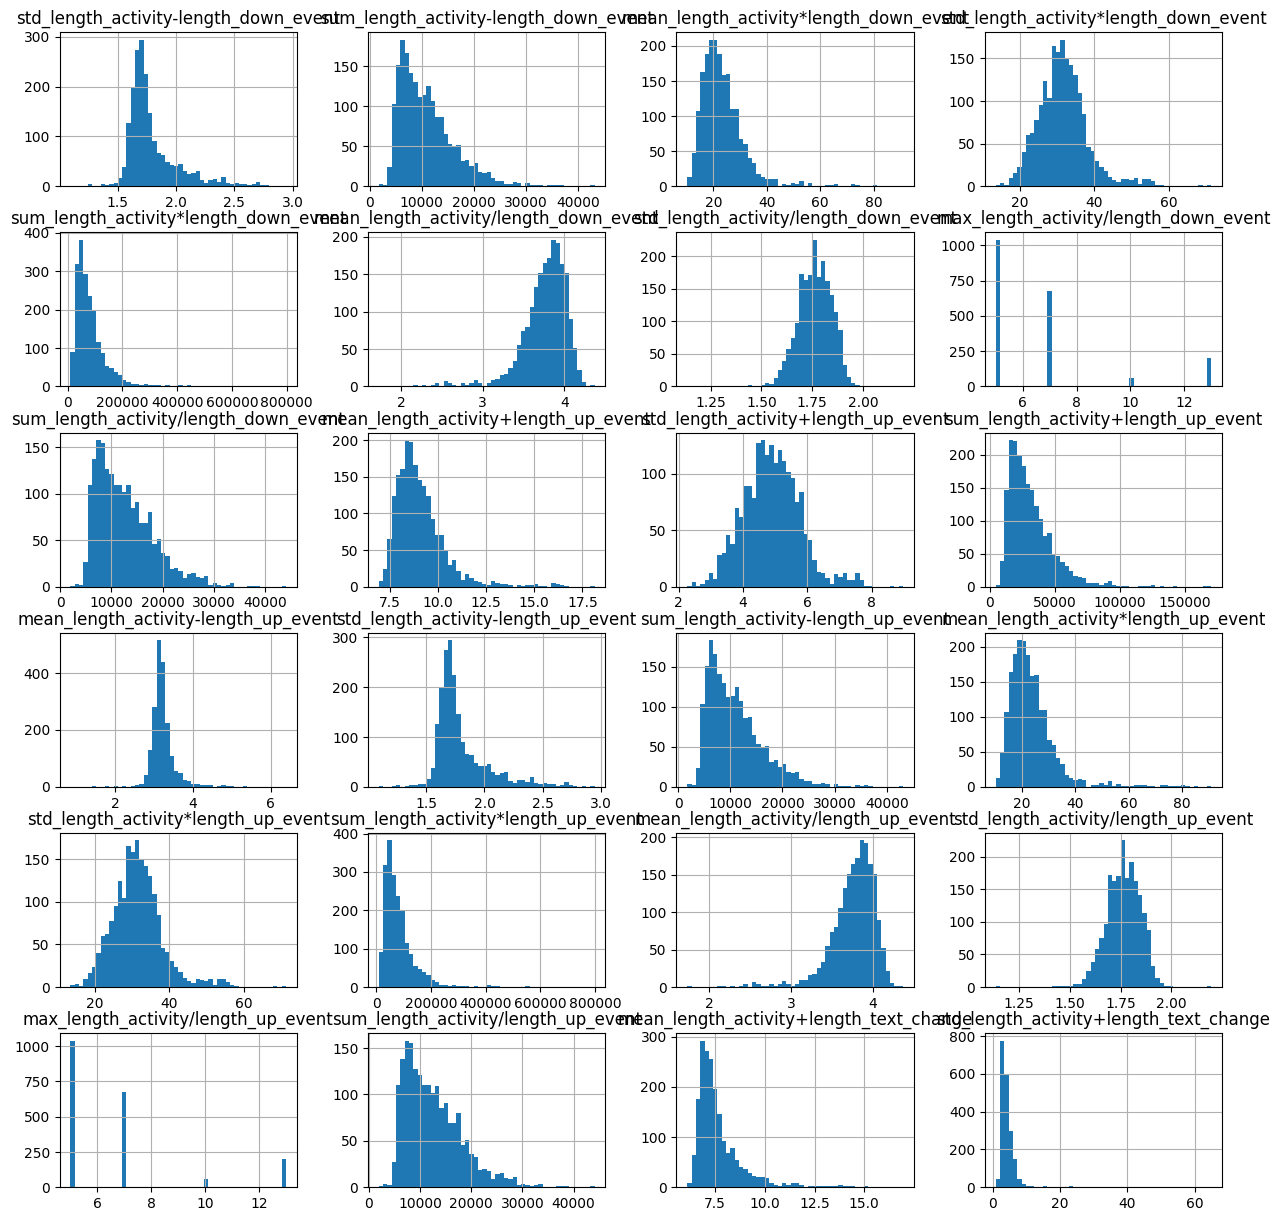

In [10]:
cols = 4
rows = 6
subset = [fieldnames[i] for i in range(25,24 + rows * cols + 1)]
X_train[subset].hist(bins=50, figsize=(15,15), layout=(rows,cols))

In [11]:
y_train

0       3.5
1       5.5
2       5.0
3       2.5
4       5.0
5       4.5
6       0.5
7       3.0
8       3.0
9       1.5
10      3.5
11      3.5
12      1.0
13      2.0
14      4.5
15      1.5
16      1.0
17      2.5
18      2.5
19      3.0
20      4.0
21      4.0
22      4.0
23      4.0
24      3.0
25      4.0
26      3.0
27      2.5
28      3.5
29      3.5
30      3.0
31      2.0
32      4.5
33      3.5
34      3.5
35      2.5
36      3.5
37      2.0
38      3.0
39      3.5
40      3.5
41      4.0
42      3.0
43      5.0
44      3.0
45      4.0
46      3.0
47      4.0
48      3.0
49      4.0
50      3.5
51      3.5
52      2.5
53      5.0
54      5.0
55      4.0
56      2.0
57      4.0
58      4.5
59      5.0
60      3.5
61      5.0
62      4.5
63      4.0
64      2.0
65      4.5
66      2.5
67      4.5
68      4.0
69      4.0
70      5.0
71      3.0
72      4.0
73      5.5
74      4.5
75      3.5
76      3.0
77      3.0
78      2.0
79      5.5
80      3.5
81      5.0
82      4.5
83  

In [12]:
list(set(y_train))

[0.5, 1.5, 2.5, 3.5, 4.5, 5.0, 5.5, 3.0, 1.0, 2.0, 4.0, 6.0]

In [13]:

possible_numbers = list(set(y_train))
mapping = {val: idx for idx, val in enumerate(possible_numbers)}
y_train = [mapping[val] for val in y_train]

In [14]:
list(set(y_train))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [28]:
matplotlib.use(backend="WebAgg")
# open http://127.0.0.1:8988/ in browser

In [34]:
fig = plt.figure()
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(241, projection='3d')
ax.scatter(X_train.iloc[:,1], X_train.iloc[:,2], X_train.iloc[:,3], c='r', marker='o')

ax = fig.add_subplot(242, projection='3d')
ax.scatter(X_train.iloc[:,3], X_train.iloc[:,4], X_train.iloc[:,5], c='r', marker='o')

ax = fig.add_subplot(243, projection='3d')
ax.scatter(X_train.iloc[:,5], X_train.iloc[:,6], X_train.iloc[:,7], c='r', marker='o')

ax = fig.add_subplot(244, projection='3d')
ax.scatter(X_train.iloc[:,7], X_train.iloc[:,8], X_train.iloc[:,9], c='r', marker='o')

#####

ax = fig.add_subplot(245, projection='3d')
ax.scatter(X_train.iloc[:,9], X_train.iloc[:,10], X_train.iloc[:,11], c='r', marker='o')

ax = fig.add_subplot(246, projection='3d')
ax.scatter(X_train.iloc[:,12], X_train.iloc[:,13], X_train.iloc[:,14], c='r', marker='o')

ax = fig.add_subplot(247, projection='3d')
ax.scatter(X_train.iloc[:,14], X_train.iloc[:,15], X_train.iloc[:,16], c='r', marker='o')

ax = fig.add_subplot(248, projection='3d')
ax.scatter(X_train.iloc[:,16], X_train.iloc[:,17], X_train.iloc[:,18], c='r', marker='o')

# Displaying the plot
plt.show()

In [41]:
pca = PCA(n_components=16)  # Set the number of components to 16

# Fit PCA on your data
pca.fit(X_train)

fig = plt.figure()
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(241, projection='3d')
ax.scatter(pca.components_[0], pca.components_[1], pca.components_[2], c='b', marker='o')

ax = fig.add_subplot(242, projection='3d')
ax.scatter(pca.components_[2], pca.components_[3], pca.components_[4], c='b', marker='o')

ax = fig.add_subplot(243, projection='3d')
ax.scatter(pca.components_[4], pca.components_[5], pca.components_[6], c='b', marker='o')

ax = fig.add_subplot(244, projection='3d')
ax.scatter(pca.components_[6], pca.components_[7], pca.components_[8], c='b', marker='o')

#####

ax = fig.add_subplot(245, projection='3d')
ax.scatter(pca.components_[8], pca.components_[9], pca.components_[10], c='b', marker='o')

ax = fig.add_subplot(246, projection='3d')
ax.scatter(pca.components_[10], pca.components_[11], pca.components_[12], c='b', marker='o')

ax = fig.add_subplot(247, projection='3d')
ax.scatter(pca.components_[12], pca.components_[13], pca.components_[14], c='b', marker='o')

ax = fig.add_subplot(248, projection='3d')
ax.scatter(pca.components_[14], pca.components_[15], pca.components_[0], c='b', marker='o')



In [40]:
len(pca.components_[2])

469